In [10]:
# !pip install scikit-learn

1715
1715


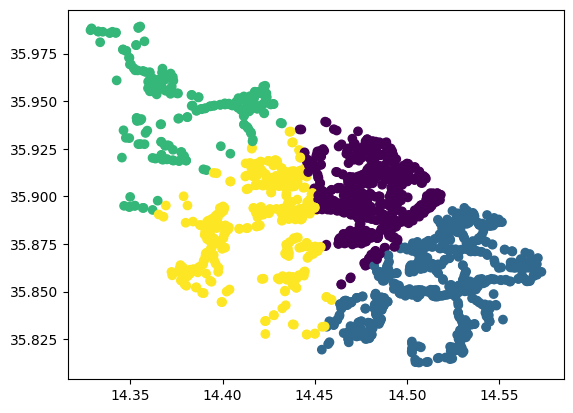

In [80]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import json

BUS_STOP_DATA_PATH = "C:/Users/lukec/Documents/Thesis/BusRouting/FYP-Flexible-Bus/Data/BusStopsMalta/export.json"
f = open(BUS_STOP_DATA_PATH, "r",encoding="utf-8")
data = json.load(f)
elements = data["elements"]

longitudes = []
latitudes = []
for element in elements:
    longitudes.append(element["lon"])
    latitudes.append(element["lat"])

print(len(longitudes))
print(len(latitudes))

data = list(zip(longitudes, latitudes))
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(longitudes, latitudes, c=kmeans.labels_)

#Create a new json file with the cluster data
cluster_data = {
    "clusters": 4, #Number of clusters
    "cluster_data": {
        #Create 4 empty arrays for the clusters
        "0": [],
        "1": [],
        "2": [],
        "3": []
    }
}

for i in range(len(longitudes)):
    cluster_data["cluster_data"][str(kmeans.labels_[i])].append({
        "lat": latitudes[i],
        "lon": longitudes[i]
    })

cluster_data["cluster_centers"] = {}
for i in range(len(kmeans.cluster_centers_)):
    cluster_data["cluster_centers"][i] = {
        "lat": kmeans.cluster_centers_[i][1],
        "lon": kmeans.cluster_centers_[i][0]
    }

with open('C:/Users/lukec/Documents/Thesis/BusRouting/FYP-Flexible-Bus/Data/BusStopsMalta/clustered.json', 'w+') as outfile:
    json.dump(cluster_data, outfile)